# Topic Modelling using the Paper Abstract

Modified from the Sklearn tutorial [here](https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer # use tfidf (loses order information)
from sklearn.decomposition import NMF, LatentDirichletAllocation # we will compare NMR and LDA
import utils

sns.set() # use sns style for plots

We will convert the titles to a matrix of tf-idf features using the TfidfVectorizer

In [2]:
# import augmented cvpr data
df = pd.read_csv("data\\cvpr_data.csv")
df.head(1)

,title,authors,abstract,link,year,citation_count,doi,citation,title_open_cite
0,Deformable Spatial Pyramid Matching for Fast D...,"Jaechul Kim, Ce Liu, Fei Sha, Kristen Grauman",We introduce a fast deformable spatial pyramid...,content_cvpr_2013/papers/Kim_Deformable_Spatia...,2013,120,10.1109/cvpr.2013.299,10.1007/978-3-030-01249-6_36; 10.2493/jjspe.84...,deformable spatial pyramid matching for fast d...


In [3]:
# get abstracts from the dataframe
abstracts = df["abstract"]
print(abstracts[0])

We introduce a fast deformable spatial pyramid (DSP) matching algorithm for computing dense pixel correspondences. Dense matching methods typically enforce both appearance agreement between matched pixels as well as geometric smoothness between neighboring pixels. Whereas the prevailing approaches operate at the pixel level, we propose a pyramid graph model that simultaneously regularizes match consistency at multiple spatial extents--ranging from an entire image, to coarse grid cells, to every single pixel. This novel regularization substantially improves pixel-level matching in the face of challenging image variations, while the "deformable" aspect of our model overcomes the strict rigidity of traditional spatial pyramids. Results on LabelMe and Caltech show our approach outperforms state-of-the-art methods (SIFT Flow [15] and PatchMatch [2]), both in terms of accuracy and run time.


Bigrams and trigrams seem to work better since a lot of popular terms come in that format e.g convolutinal neural networks, generative adversarial networks, object detection, etc

In [10]:
max_features = 1000 # build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
min_df = 2 # min number of terms
max_df = 0.95 # 
ngram_range = (1,1) # unigrams and bigrams
tfidf_vectorizer = TfidfVectorizer(
    max_df=max_df, min_df=min_df, max_features=max_features, stop_words="english", ngram_range=ngram_range
)

# fit and transform
tfidf = tfidf_vectorizer.fit_transform(abstracts)

# inspect fitted vocabulary (change above parameters to get desired results), for example unigrams don't work well
# print(list(tfidf_vectorizer.vocabulary_.items()))

Some words need to be removed manually such as "based" which doesn't contain a lot of information

In [36]:
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS.union(["based", "algorithm", "computer", "simple", "accurate",  "focus", "function"
                                            "efficient", "large", "approach", "enhanced", "rich", "using", "novel", "improved",
                                            "introduce", "accurately", "algorithm", "methods", "typically", "enforce", "approaches",
                                            "approach", "operate", "propose", "model", "easily", "accuracy", "effective", "improved",
                                            "techniques", "using", "need", "outperform", "evaluate", "explicit", "explicitly",
                                            "experiment", "experiments", "estimation", "exploit", "exploits", "exploiting", "explore",
                                            "explores", "estimated", "expression", "experimental", "expensive", "estimate", "extra",
                                            "extensive", "extend", "performed", "performing", "performs", "pipeline", "popular",
                                            "positive", "possible", "potential", "power", "powerful", "perform", "outperform",
                                            "outperforming", "outperforms", "output", "outputs", "overcome", "particularly",
                                            "provide", "providing", "predict", "predictions", "produce", "produces", "procedure",
                                            "error", "employ", "especially","enhance", "evaluation", "evaluations", "build", "building",
                                            "built", "called", "capability", "capable", "captured", "captures", "capturing",
                                            "case", "better", "best", "benefits", "benefit", "associated", "assumption", "automatic", 
                                            "automatically", "available", "average", "avoid", "base", "baseline", "baselines",
                                            "batch", "benchmark", "benchmarks", "auxiliary", "demonstrate", "demonstrated", 
                                            "given", "global", "goal", "good", "great", "guidance", "handle", "help",  "high",
                                            "formulation", "forward", "frame", "frames", "framework", "free", "function",
                                            "functions", "fundamental", "furthermore", "future", "gaze", "general", "generalization",
                                            "generalize", "generalized", "higher", "highly", "initial", "input", "inputs", "instead",
                                            "formulate", "implicit", "important", "improve", "improvement", "improvements", "improves", "improving",
                                            "including", "incorporate", "increase", "increasing", "despite", "details", "design", "designed",
                                            "importance", "form", "foreground", "following", "directions", "directly",  "effectively",
                                            "disparity", "distance", "diverse", "diversity", "does", "driven", "driving", "dual", "easy",
                                            "editing", "effect", "direction", "direct", "difficulty", "demonstrates",
                                            "dependencies", "dependent", "derive", "description", "develop", "developed", "difference",
                                            "different", "difficult", "detailed", "yields", "effectiveness", "efficiency", "facilitate", 
                                            "fact", "factors", "fail", "far", "finally", "finding", "fine", "fitting", "fixed", "flexible",
                                            "extremely", "extraction", "extracted", "extract", "efficient", "efficiently", "empirical",
                                            "empirically", "enable", "enables", "enabling", "encode", "estimating", "evaluated", "event", "events", "example",
                                            "encoder", "encoding", "end", "effects", "environment", "environments", "errors", "essential", "estimates",
                                            "examples", "existing", "entire"])

max_features = 1000 # build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
min_df = 2 # min number of terms
max_df = 0.95
ngram_range = (1,1) # unigrams, bigrams and trigrams
tfidf_vectorizer = TfidfVectorizer(
    max_df=max_df, min_df=min_df, max_features=max_features, stop_words=stop_words, ngram_range=ngram_range
)

# fit and transform
tfidf = tfidf_vectorizer.fit_transform(abstracts)

# inspect fitted vocabulary (change above parameters to get desired results), for example unigrams don't work well
print(list(tfidf_vectorizer.vocabulary_.items())[0:10])

[('fast', 307), ('deformable', 248), ('spatial', 835), ('pyramid', 673), ('matching', 491), ('computing', 179), ('dense', 252), ('pixel', 618), ('correspondences', 225), ('appearance', 58)]


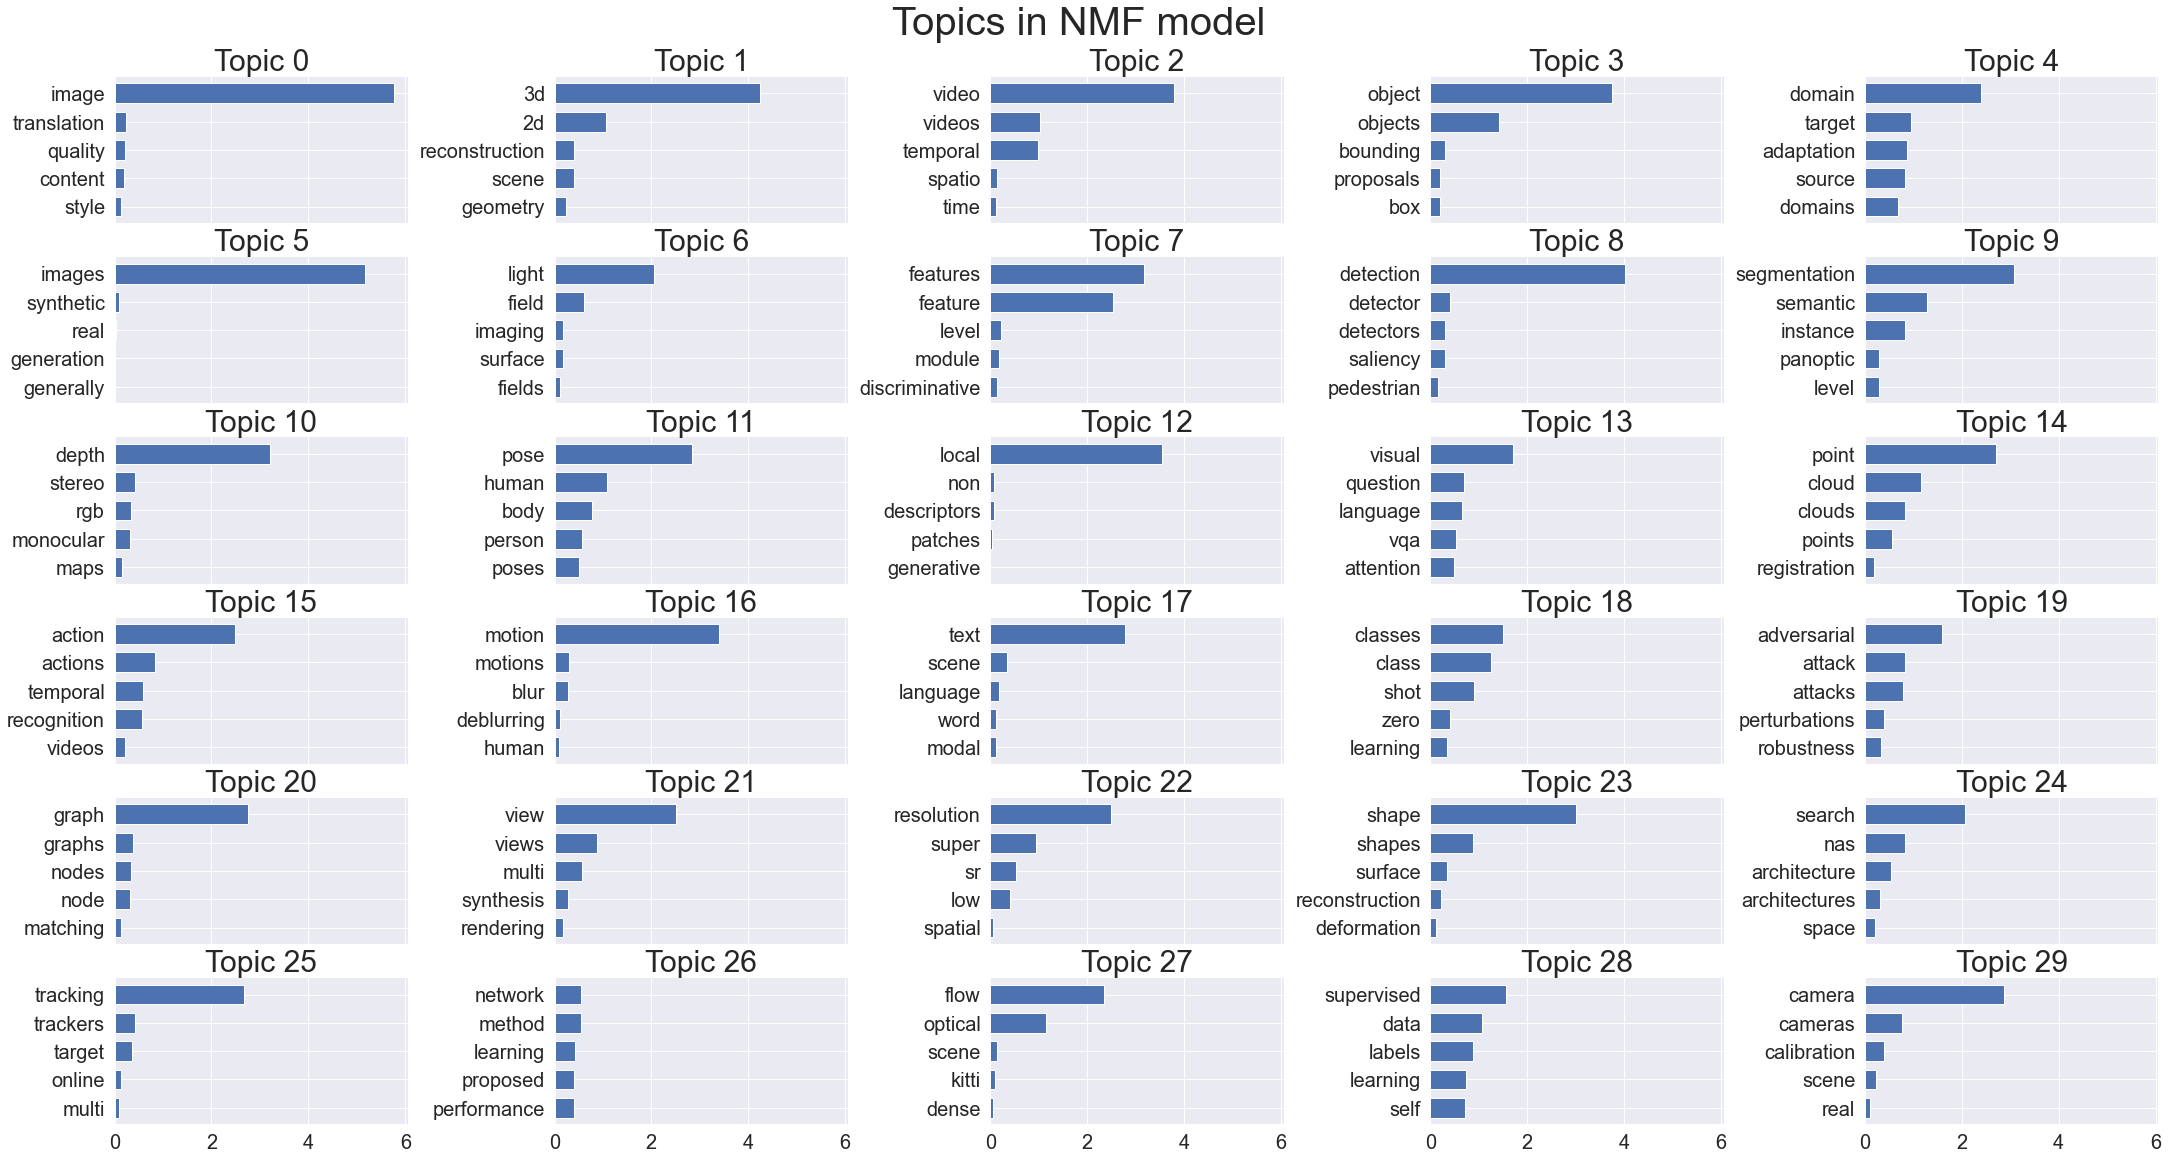

<Figure size 432x288 with 0 Axes>

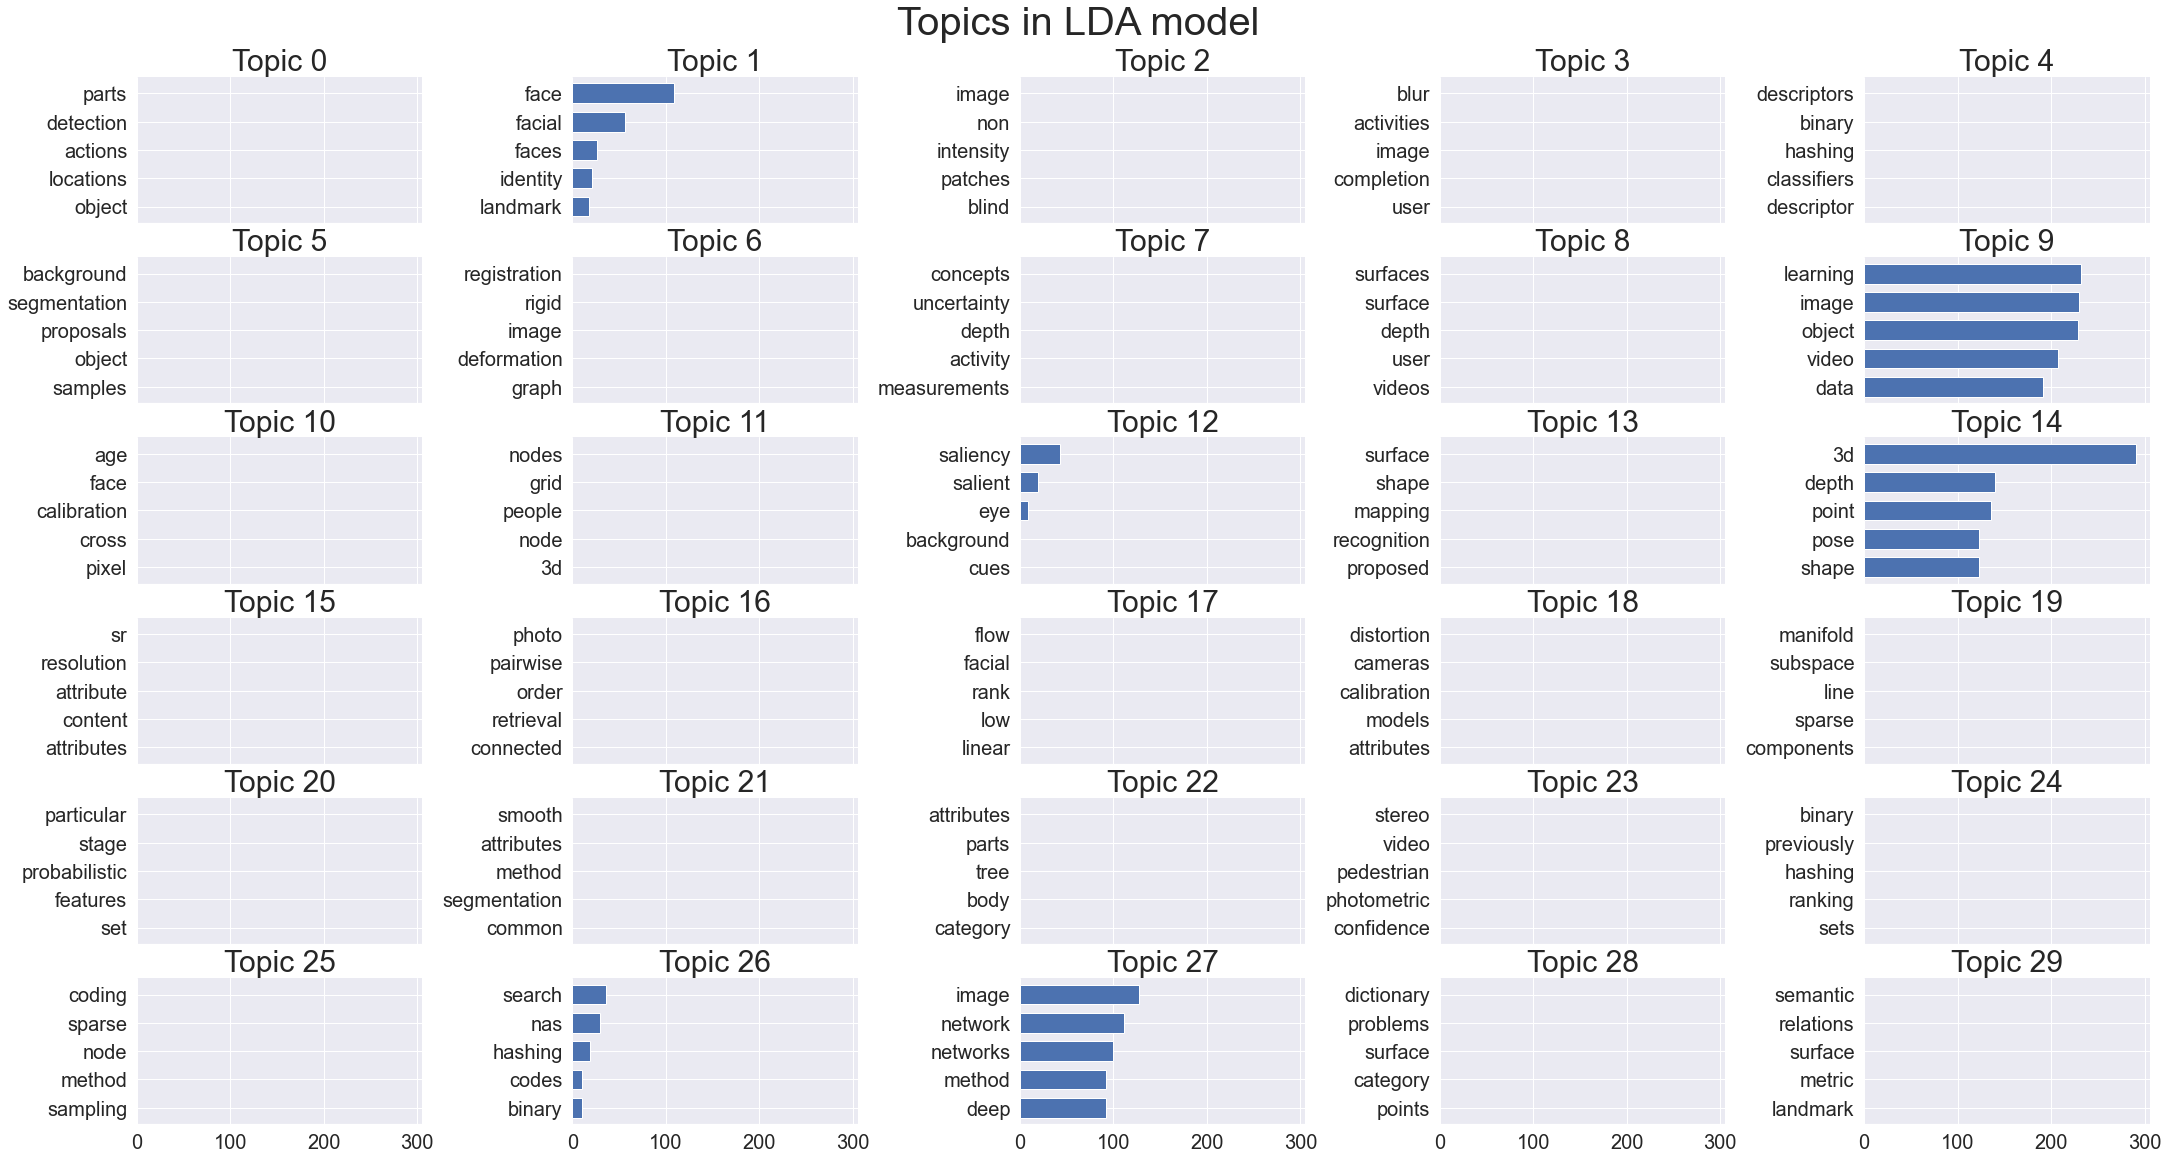

<Figure size 432x288 with 0 Axes>

In [40]:

n_components = 30 # total number of topics
n_top_words = 5 # number of words to plot
figsize=(30,16) # figure size


nmf = NMF(
    n_components=n_components,
    random_state=1,
    init="nndsvda",
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
    max_iter=400
).fit(tfidf)

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
fig1 = utils.plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model ",
    figsize=figsize
)


lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(tfidf)

fig2 = utils.plot_top_words(
    lda,
    tfidf_feature_names,
    n_top_words, "Topics in LDA model ",
    figsize=figsize
    )

Save NMF topic modelling results for further processing and EDA and pickle the NMF model as well as the vectorizer

In [41]:
topic_vector = nmf.transform(tfidf)
df["topic_class"] =  np.argmax(topic_vector, axis=1) # just keep the topic class
df.to_csv("cvpr_data_with_abstract_topics.csv", index=False)
df.head(1)

,title,authors,abstract,link,year,citation_count,doi,citation,title_open_cite,topic_class
0,Deformable Spatial Pyramid Matching for Fast D...,"Jaechul Kim, Ce Liu, Fei Sha, Kristen Grauman",We introduce a fast deformable spatial pyramid...,content_cvpr_2013/papers/Kim_Deformable_Spatia...,2013,120,10.1109/cvpr.2013.299,10.1007/978-3-030-01249-6_36; 10.2493/jjspe.84...,deformable spatial pyramid matching for fast d...,26


In [42]:
df.groupby("topic_class").count()

,title,authors,abstract,link,year,citation_count,doi,citation,title_open_cite
topic_class,,,,,,,,,
0,55,55,55,55,55,55,55,39,48
1,238,238,238,238,238,238,238,146,184
2,286,286,286,286,286,286,286,181,217
3,225,225,225,225,225,225,225,157,181
4,341,341,341,341,341,341,341,190,254
5,36,36,36,36,36,36,36,27,32
6,160,160,160,160,160,160,160,115,142
7,96,96,96,96,96,96,96,71,78
8,127,127,127,127,127,127,127,88,99


In [43]:
import pickle
import os

try:
    os.mkdir("model")
except:
    print("Folder already exists, overwriting contents ...")

with open("model\\nmf_abstract.pickle", "wb") as f:
    pickle.dump(nmf, f)

with open("model\\tfidf_vectorizer_abstract.pickle", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

with open("model\\topic_vector_abstract.pickle", "wb") as f:
    pickle.dump(topic_vector, f)

print("Data saved.")

Folder already exists, overwriting contents ...
Data saved.
